## Data transformation

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [20]:
df = pd.read_csv('customer_supermarket_prepared.csv', sep=',')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(30)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
5,536365,2010-12-01 08:26:00,7.65,17850,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2,15.30
6,536365,2010-12-01 08:26:00,4.25,17850,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,25.50
7,536366,2010-12-01 08:28:00,1.85,17850,United Kingdom,22633,HAND WARMER UNION JACK,6,11.10
8,536366,2010-12-01 08:28:00,1.85,17850,United Kingdom,22632,HAND WARMER RED POLKA DOT,6,11.10
9,536368,2010-12-01 08:34:00,4.25,13047,United Kingdom,22960,JAM MAKING SET WITH JARS,6,25.50


In [21]:
df['BasketDate'] = pd.to_datetime(df['BasketDate'], format="%Y-%m-%d %H:%M:%S")

### Calcolo gli attributi I e Iu

In [22]:
df1 = df.groupby('CustomerID').aggregate({'Qta':'sum', 'ProdID':'nunique'})
df1.rename(columns={'Qta':'I', 'ProdID':'Iu'}, inplace=True)

### Cacolo l'attributo Imax

In [23]:
df_agg = df.groupby(['CustomerID', 'BasketID']).aggregate({'Qta':'sum'}).reset_index(level='CustomerID')

df2 = df_agg.groupby('CustomerID').aggregate({'Qta':'max'})
df2.rename(columns={'Qta':'Imax'}, inplace=True)

In [24]:
df_customer = pd.merge(df1, df2, on='CustomerID')
df_customer

,I,Iu,Imax
CustomerID,,,
12346,74215,1,74215
12347,2458,103,676
12348,2332,21,1248
12349,630,72,630
12350,196,16,196
...,...,...,...
18280,45,10,45
18281,54,7,54
18282,103,12,75


I: the total number of items purchased by a customer during the period of observation.

Iu: the number of distinct items bought by a customer in the period of observation.

Imax: the maximum number of items purchased by a customer during a shopping session.

### Indicatori aggiuntivi

Per ogni utente calcolo:
- Il numero totale di basket 
- Recency: la recency indica il numero di giorni che l'utente è stato inattivo, con riferimento alla data più recente contenuta nel dataset (2011-12-09)
- Frequency: il numero tatale di ordini fatti dall'utente, durante l'intero periodo di osservazione
- MonetaryValue: quanto  l'utente ha speso in totale, durante l'intero periodo di osservazione

In [25]:
df_n_basket_per_user = df.groupby('CustomerID').aggregate({'BasketID':'nunique'})
df_n_basket_per_user.rename(columns={'BasketID':'NumBasket'}, inplace=True)
df_customer['NumBasket'] = df_n_basket_per_user['NumBasket']
df_customer

,I,Iu,Imax,NumBasket
CustomerID,,,,
12346,74215,1,74215,1
12347,2458,103,676,7
12348,2332,21,1248,4
12349,630,72,630,1
12350,196,16,196,1
...,...,...,...,...
18280,45,10,45,1
18281,54,7,54,1
18282,103,12,75,2


In [26]:
#Recency
df_max_date = df.groupby('CustomerID').aggregate({'BasketDate':'max'})
recency = (df['BasketDate'].max() - df_max_date['BasketDate']).dt.days
df_customer['Recency'] = recency

#Frequency
df_frequency = df.groupby('CustomerID').aggregate({'BasketID':'count'})
frequency = df_frequency['BasketID']
df_customer['Frequency'] = frequency

#MonetaryValue
df_customer['MonetaryValue'] = df.groupby('CustomerID').aggregate({'TotSale':'sum'})['TotSale']

df_customer

,I,Iu,Imax,NumBasket,Recency,Frequency,MonetaryValue
CustomerID,,,,,,,
12346,74215,1,74215,1,325,1,77183.60
12347,2458,103,676,7,1,182,4310.00
12348,2332,21,1248,4,74,27,1437.24
12349,630,72,630,1,18,72,1457.55
12350,196,16,196,1,309,16,294.40
...,...,...,...,...,...,...,...
18280,45,10,45,1,277,10,180.60
18281,54,7,54,1,180,7,80.82
18282,103,12,75,2,7,12,178.05


In [27]:
df_customer.describe()

,I,Iu,Imax,NumBasket,Recency,Frequency,MonetaryValue
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,1186.795428,61.419303,402.468714,4.249596,91.673055,90.261141,2016.793320
std,5042.345078,85.339242,1794.231822,7.641705,100.243029,224.790193,8906.718402
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.750000
25%,159.000000,16.000000,120.000000,1.000000,17.000000,17.000000,303.950000
50%,377.000000,35.000000,224.000000,2.000000,50.000000,41.000000,663.610000
75%,990.500000,77.000000,405.500000,5.000000,142.000000,98.000000,1632.775000
max,196844.000000,1785.000000,80995.000000,206.000000,373.000000,7667.000000,279138.020000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200393E8190>]],
      dtype=object)

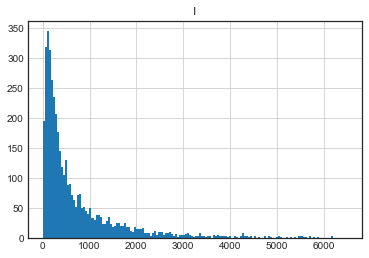

In [49]:
df_customer.hist(column='I', bins=150, range=[0, 6500])

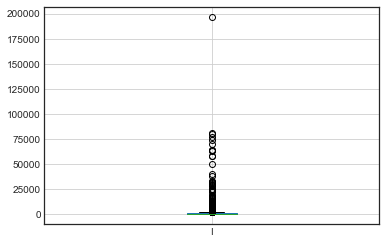

In [43]:
df_customer.boxplot(column='I')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200397EABB0>]],
      dtype=object)

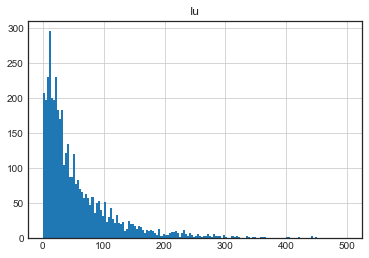

In [52]:
df_customer.hist(column='Iu', bins=150, range=[0, 500])

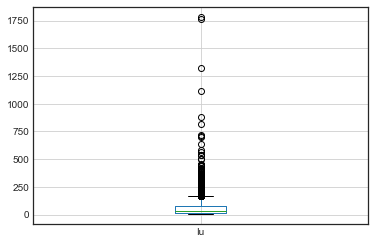

In [53]:
df_customer.boxplot(column='Iu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002003A369550>]],
      dtype=object)

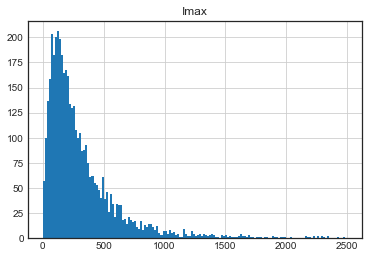

In [61]:
df_customer.hist(column='Imax', bins=150, range=[0, 2500])

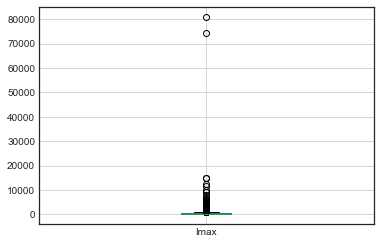

In [62]:
df_customer.boxplot(column='Imax')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002003BF29B20>]],
      dtype=object)

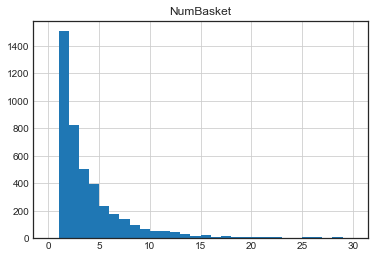

In [71]:
df_customer.hist(column='NumBasket', bins=30, range=[0,30])

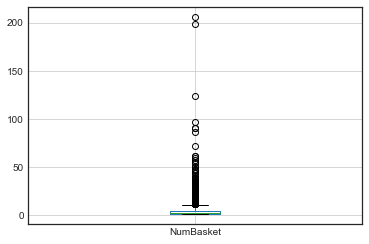

In [72]:
df_customer.boxplot(column='NumBasket')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002003C6F54F0>]],
      dtype=object)

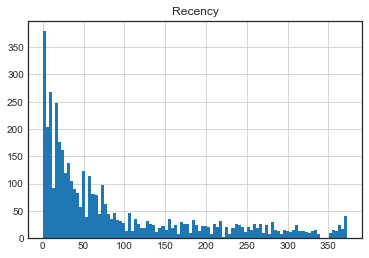

In [77]:
df_customer.hist(column='Recency', bins=100)

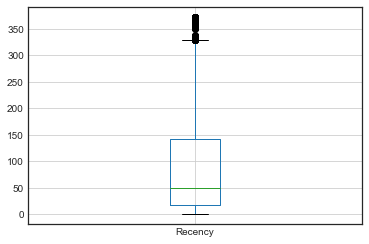

In [78]:
df_customer.boxplot(column='Recency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002003CD07610>]],
      dtype=object)

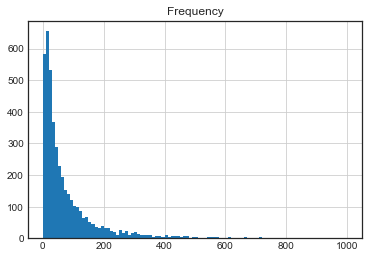

In [82]:
df_customer.hist(column='Frequency', bins=100, range=[0,1000])

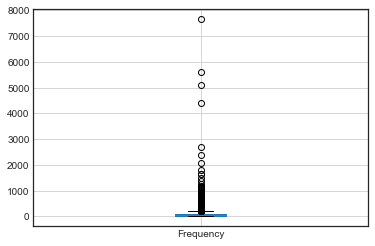

In [83]:
df_customer.boxplot(column='Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002003D2E28B0>]],
      dtype=object)

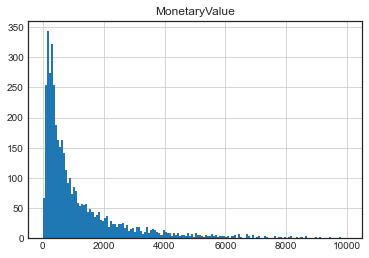

In [88]:
df_customer.hist(column='MonetaryValue', bins=150, range=[0, 10000])

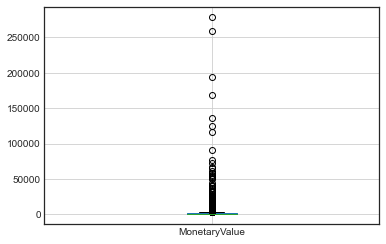

In [84]:
df_customer.boxplot(column='MonetaryValue')

In [89]:
df_customer.corr()

,I,Iu,Imax,NumBasket,Recency,Frequency,MonetaryValue
I,1.000000,0.408777,0.579691,0.555575,-0.122922,0.432160,0.923445
Iu,0.408777,1.000000,0.108235,0.691681,-0.300605,0.876765,0.378293
Imax,0.579691,0.108235,1.000000,0.128063,-0.040044,0.096216,0.528033
NumBasket,0.555575,0.691681,0.128063,1.000000,-0.261171,0.756280,0.547377
Recency,-0.122922,-0.300605,-0.040044,-0.261171,1.000000,-0.206426,-0.120902
Frequency,0.432160,0.876765,0.096216,0.756280,-0.206426,1.000000,0.414300
MonetaryValue,0.923445,0.378293,0.528033,0.547377,-0.120902,0.414300,1.000000


In [95]:
df_customer_reduced = df_customer.drop(columns=['I','Iu', 'NumBasket'])
df_customer_reduced

,Imax,Recency,Frequency,MonetaryValue
CustomerID,,,,
12346,74215,325,1,77183.60
12347,676,1,182,4310.00
12348,1248,74,27,1437.24
12349,630,18,72,1457.55
12350,196,309,16,294.40
...,...,...,...,...
18280,45,277,10,180.60
18281,54,180,7,80.82
18282,75,7,12,178.05
